## Introduction

##### $\rightarrow$ Provide a brief introduction to the purpose of this notebook.

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import missingno as msno

## Load clean data

##### $\rightarrow$ Load the clean data set from Github. 

In [33]:
url = 'https://raw.githubusercontent.com/theslic/DATA3320-Seattle-Weather/main/clean_seattle_stl_weather.csv'
df = pd.read_csv(url, index_col=0)

##### $\rightarrow$ Review the contents of the data set.

In [34]:
df.head(5)

,city,precipitation,day_of_year,month,year,zero_precip
date,,,,,,
2018-01-01,STL,0.0,1,1,2018,True
2018-01-02,STL,0.0,2,1,2018,True
2018-01-03,STL,0.0,3,1,2018,True
2018-01-04,STL,0.0,4,1,2018,True
2018-01-05,STL,0.0,5,1,2018,True


## State your questions

The overall problem is to compare how much it rains in Seattle and St. Louis. To answer this general problem, you will need to ask specific questions about the data.


##### $\rightarrow$ List your questions about the data that will help you solve the problem.


*   Which city has rain more often?

*   Which city has higher amounts of rainfall when it does rain?

## Analysis

Perform analyses necessary to answer the questions. You will likely start by trying many things, some of which are useful and some of which are not. Don't be afraid to try different analyses at first. You will edit your notebook to a clean version that retains only the essential components at the end of the project.

The plot below shows the general amounts of rainfall for both cities. From this plot we see than most of the rainfall is in very low numbers as there is a significant skew with the large bar on the left.

<Axes: xlabel='precipitation', ylabel='Count'>

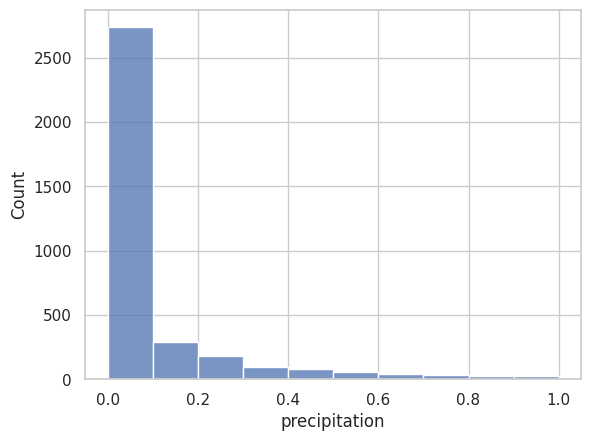

In [14]:
sns.histplot(data=df, x='precipitation', binwidth = .1, binrange = (0, 1))

This plot shows the number of days it did not rain and did rain. It is a simple histogram of the 'zero_precip' column which is a boolean column keeping track of whether it rained that day or not. 

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


<Axes: title={'center': 'Did it rain?'}, xlabel='zero_precip', ylabel='Frequency'>

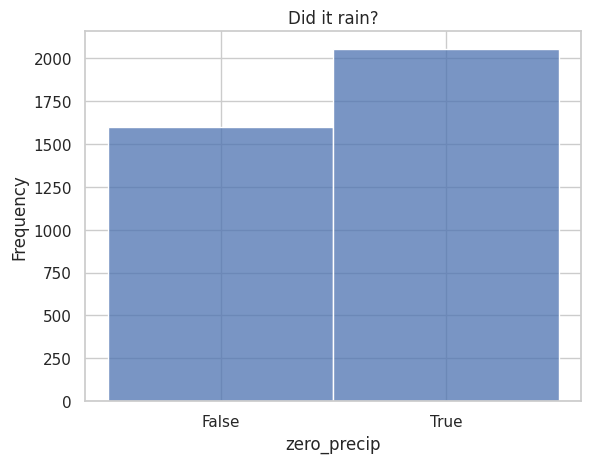

In [70]:
df['zero_precip'] = df['precipitation'] == 0
plot = sns.histplot(data=df, x='zero_precip', binwidth=.5, bins=2)
plt.xticks([.25, .75], ['False', 'True'])
# Show the plot
plot.set_title('Did it rain?')
plot.set_ylabel('Frequency')
plot

### Results for communication assignment

This file should clearly produce the graphs, tables, models, etc that appear in the communication assignment.

This is a plot of the average rainfall per month by city. This plot shows that both cities have very similar average rainfall, however the rain takes place at different times of the year.

Text(0.5, 1.0, 'Average Rain per Month by City')

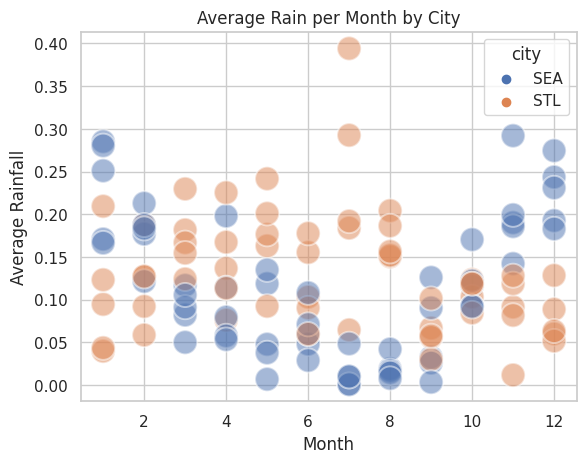

In [15]:
avg_rainfall = df.groupby(['month', 'year', 'city']).mean()
sns.scatterplot(data=avg_rainfall, x='month', y='precipitation', hue='city', s=300, alpha = 0.5)
plt.xlabel("Month")
plt.ylabel("Average Rainfall")
plt.title("Average Rain per Month by City")

This is a count of the number of days it did not rain per month by city. We can see that St.Louis has only a slight variance with the number of dry days while Seattle has multiple months where it rained a lot. From this plot we can conclude that it rains more often in Seattle. 

Text(0.5, 1.0, 'Days of No Rain by City')

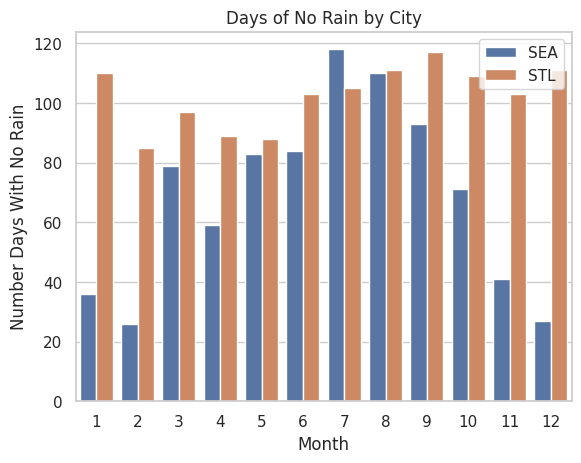

In [52]:
result = df[df['zero_precip'] == True].groupby(['month', 'city']).size().reset_index(name='count')
avg_result = result.groupby(['month', 'city'])['count'].mean().reset_index(name='no_rain')
sns.barplot(data=avg_result, x='month', y='no_rain', hue='city')
plt.legend(loc='upper right')
plt.xlabel("Month")
plt.ylabel("Number Days With No Rain")
plt.title("Days of No Rain by City")

## Conclusion

Provide a brief description of your conclusions.

We have two plots to determine which area has more rain. In the first plot we can see that Seattle has more rain at the beginning and end of the year while St.Louis rains more in the middle of the year. This plot shows that they have different rainy seasons so it would not be good to compare only specific months. This also answers the question of which city gets rain more often, however they are too similar to make a clear comparison. This leads to the second plot which displays the number of days without rain for each month over the years. Now we can see the difference more clearly, we see that, just like the previous plot, Seattle has the most rain in December, January, and Febuary. However, we see that while there are some fluctuations, but St.Louis mainly maintatins the same amount of days of rain. From these plots we can conclude that Seattle has days that rain. This is because the average precipitation between the two cities are similar, however Seattle has far more rainy days.
